<a href="https://www.kaggle.com/code/muhammadajlalkhan/notebook8a75132d9b?scriptVersionId=147244962" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding, Gradient Descent is at the core of deep learning that is why in this notebook I have used a very simple data set to implement both Batch and Stochastic Gradient Descent in python without using Tensorflow so that I can unserstand the actual working behind a Neural Network training. The Batch gradient descent uses all training samples during forward propogation to calculate cumulitive error and than it adjust weights using derivaties. While, Stochastic GD,randomly pick one training sample, perform forward pass, compute the error and immidiately adjust weights. So the key difference between the writing the functions of both BGD and SGD is to adjust weights using data set differently: batch GD will use all training samples where as stochastic GD will use one randomly picked training sample. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading Data & Defining Variables

In [2]:
df = pd.read_csv('/kaggle/input/custom-data/homeprices_banglore.csv')
df

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00
5,1170,2,38.00
6,2732,4,135.00
7,3300,4,155.00
8,1310,3,50.00
9,3700,5,167.00


In [3]:
X = df.drop('price', axis='columns')
X

,area,bedrooms
0,1056,2
1,2600,4
2,1440,3
3,1521,3
4,1200,2
5,1170,2
6,2732,4
7,3300,4
8,1310,3
9,3700,5


In [4]:
y = df.price
y

0      39.07
1     120.00
2      62.00
3      75.00
4      51.00
5      38.00
6     135.00
7     155.00
8      50.00
9     167.00
10     82.00
11    140.00
12     38.00
13     40.00
14    101.00
15     42.00
16     48.00
17     60.00
18    102.00
19     32.00
Name: price, dtype: float64

# Data Pre-processing

In [5]:
# Scaling our data helps Machine Learning models to work more efficiently
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()
X_scaled = sx.fit_transform(X)
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [6]:
# We should convert target column (i.e. price) into one dimensional array. It has become 2D due to 
# scaling that we did above but now we should change to 1D
y_scaled = sy.fit_transform(y.values.reshape(df.shape[0],1))
y_scaled.reshape(20,)


array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

# Batch Gradient Descent & Visualization

In [7]:
# Now we want to implement gradient descent to know the values of w1 and w2 and bias for our Neural Networks 
# we will use both Batch Gradient Descent as well as Stochastic Gradient Descent.

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):

    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 2 (area, bedroom)
    w = np.ones(shape=(number_of_features))  # weights(w1,w2 etc.)
    b = 0 # b=bias
    total_samples = X.shape[0] # number of rows in X
    
    cost_list = []
    epoch_list = []
    results = []
    for i in range(epochs): 
        # Regression Equation
        y_predicted = np.dot(w, X.T) + b # X.T is transposing the rows into columns

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = batch_gradient_descent(X_scaled,y_scaled.reshape(y_scaled.shape[0],),500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

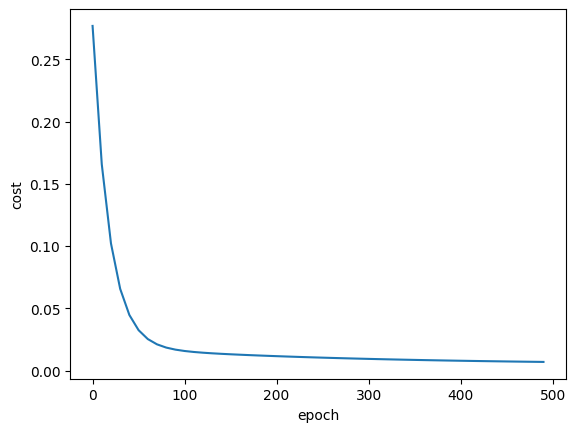

In [8]:
# We can see that the cost was high in the start but with an increase in epochs and with more and more
# backward propogation our cost becomes flat after nearly 100 epochs. Now we can easily define a prediction
# function using weights and bias. 

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

# Defining Regression Equation/Single Neural Network 

In [9]:
def predict(area,bedrooms,w,b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    # here w1 = w[0] , w2 = w[1] and bias is b
    # equation for pridce is w1*area + w2*bedrooms + bias
    # scaled_X[0] is area
    # scaled_X[1] is bedrooms
    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + b
    # once we get price prediction we need to to rescal it back to original value
    # also since it returns 2D array, to get single value we need to do value[0][0]
    return sy.inverse_transform([[scaled_price]])[0][0]

# Predictions Using Batch GD

In [10]:
predict(2600,4,w,b)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [11]:
predict(1500,3,w,b)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.47860785714694

# Stochastic Gradient Descent & Visualization 

In [12]:
# Stochastic GD will use randomly picked single training sample to calculate error and using this 
# error we backpropage to adjust weights
# we will use random libary to pick random training sample.
import random
random.randint(0,6) # randint gives random number between two numbers specified in the argument

2

In [13]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
 
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):    
        random_index = random.randint(0,total_samples-1) # random index from total samples
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        
        y_predicted = np.dot(w, sample_x.T) + b
    
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*(sample_y-y_predicted)
        
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        
        cost = np.square(sample_y-y_predicted)
        
        if i%100==0: # at every 100th iteration record the cost and epoch value
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = stochastic_gradient_descent(X_scaled,y_scaled.reshape(y_scaled.shape[0],),10000)
w_sgd, b_sgd, cost_sgd


(array([0.70754883, 0.6747641 ]), -0.22744096359595006, 0.051833006100649476)

In [14]:
w, b, cost
# We can see that for both the gradients w1, w2 and bias values are pretty same.

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

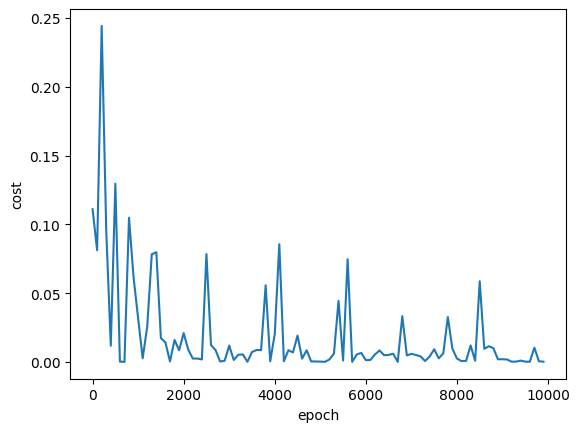

In [15]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

# Predictions Using Stochastic GD

In [16]:
predict(2600,4,w_sgd, b_sgd) 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.90304676690084

In [17]:
predict(1500,3,w_sgd, b_sgd)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


69.89837892340671